In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

***Data Import***

In [52]:
calendar = pd.read_csv('calendar.csv')

In [53]:
sell_price = pd.read_csv('sell_prices.csv')

In [54]:
sell_val = pd.read_csv('sales_train_validation.csv')

***Overall Analysis***

In [55]:
sell_val.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [56]:
#This obtains all date column names in sell_val
date_col = [col for col in sell_val if col.startswith('d_')]

In [57]:
#Add an additional column contains total sales of the row
sell_val['total_sales'] = sell_val[date_col].sum(axis=1)

In [58]:
#Agg by state
state_agg = sell_val.groupby('state_id').agg({"total_sales":"sum"}).reset_index()

In [59]:
#Agg by category
cat_agg = sell_val.groupby('cat_id').agg({"total_sales":"sum"}).reset_index()

In [60]:
#Agg by store
store_agg = sell_val.groupby('store_id').agg({"total_sales":"sum"}).reset_index()

#TODO: Generate pie chart for each of the 3 aggregations

***EDA***
* Event distribution

* SNAP distribution

* Sale price trend analysis

In [61]:
sell_price.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


In [62]:
calendar.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [63]:
sell_val.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913,total_sales
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,3,0,1,1,1,3,0,1,1,600
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,1,0,0,0,0,493
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,2,1,1,1,0,1,1,1,288
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,5,4,1,0,1,3,7,2,3288
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,0,1,1,2,2,2,4,1849


In [64]:
num_week = len(calendar['wm_yr_wk'].unique())
print('There are', num_week, 'weeks in total.')

There are 282 weeks in total.


In [65]:
event_occ = calendar.loc[(calendar['event_type_1'].notnull()) | (calendar['event_type_2'].notnull())]
event_both = calendar.loc[(calendar['event_type_1'].notnull()) & (calendar['event_type_2'].notnull())]
num_event = len(event_occ)
num_event_both = len(event_both)
print('There are', num_event, 'out of', len(calendar), 'days that includes an event.')
print('In those', num_event, 'days,', num_event_both, 'includes two events.')

There are 162 out of 1969 days that includes an event.
In those 162 days, 5 includes two events.


**Event Distribution**

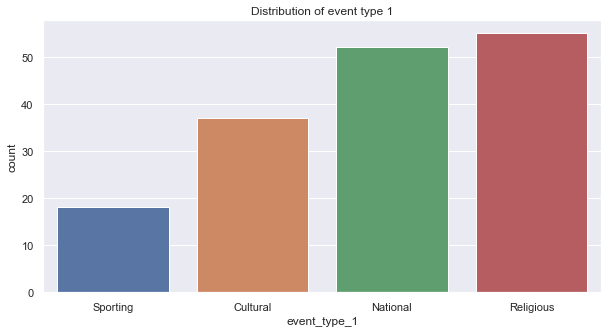

In [66]:
plt.figure(figsize=(10,5))
plt.title('Distribution of event type 1')
sns.countplot(x='event_type_1', data=event_occ)

From the distribution above, we can see that religous as well as national events took place in most of the cases.

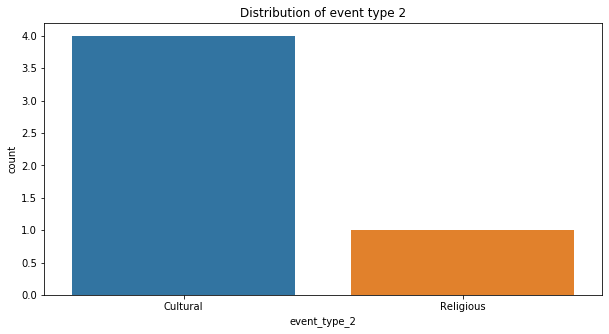

In [17]:
plt.figure(figsize=(10,5))
plt.title('Distribution of event type 2')
sns.countplot(x='event_type_2', data=event_occ)

**SNAP distribution**

**Sales price trend analysis**

In [18]:
sell_price.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


In [19]:
sell_price['wm_yr_wk'].min(), sell_price['wm_yr_wk'].max(), len(sell_price['wm_yr_wk'].unique())

(11101, 11621, 282)

In [20]:
calendar['date'].min(), calendar['date'].max()

('2011-01-29', '2016-06-19')

***Time series inspection***

In [2]:
import datetime

In [1]:
#Since the data starts on 2011-01-29, we choose this as the base time
base = datetime.datetime(2011,1,29)

NameError: name 'datetime' is not defined

In [69]:
sales_sum = pd.DataFrame(sell_val[date_col].sum(axis =0),columns = ["sales"])
sales_sum['datum'] = [base + datetime.timedelta(days=x) for x in range(1913)]

### All sales aggregation

In [70]:
sales_sum

,sales,datum
d_1,32631,2011-01-29
d_2,31749,2011-01-30
d_3,23783,2011-01-31
d_4,25412,2011-02-01
d_5,19146,2011-02-02
...,...,...
d_1909,35343,2016-04-20
d_1910,35033,2016-04-21
d_1911,40517,2016-04-22
d_1912,48962,2016-04-23


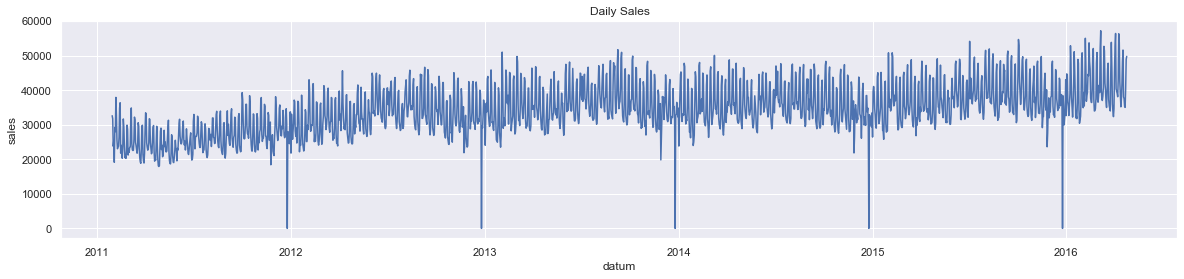

In [71]:
sns.set(rc={'figure.figsize':(20,4)})
ax = sns.lineplot(x="datum", y="sales", data=sales_sum)
plt.title('Daily Sales')
plt.show()

*From the chart above it's trivial that the sales data is very erratic and there's an obvious drop at the beginning of each year. This might need us to take another look in further analysis.*

### Sales per state

In [72]:
sell_val

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913,total_sales
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,3,0,1,1,1,3,0,1,1,600
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,1,0,0,0,0,493
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,2,1,1,1,0,1,1,1,288
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,5,4,1,0,1,3,7,2,3288
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,0,1,1,2,2,2,4,1849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3_validation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,2,2,...,0,0,0,0,0,1,0,0,1,1022
30486,FOODS_3_824_WI_3_validation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,0,0,0,0,0,1,0,720
30487,FOODS_3_825_WI_3_validation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,0,6,0,2,...,1,0,2,0,1,0,0,1,0,1712
30488,FOODS_3_826_WI_3_validation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,1,0,0,1,0,3,1,3,702


In [73]:
#State-wise sales data
state_lvl = sell_val.groupby("state_id")[date_col].sum().reset_index().set_index('state_id').T
state_lvl['datum'] = [base + datetime.timedelta(days=x) for x in range(1913)]
state_lvl.set_index('datum', inplace=True)

In [74]:
state_lvl

state_id,CA,TX,WI
datum,,,
2011-01-29,14195,9438,8998
2011-01-30,13805,9630,8314
2011-01-31,10108,6778,6897
2011-02-01,11047,7381,6984
2011-02-02,9925,5912,3309
...,...,...,...
2016-04-20,15148,9600,10595
2016-04-21,14488,9602,10943
2016-04-22,17095,10615,12807


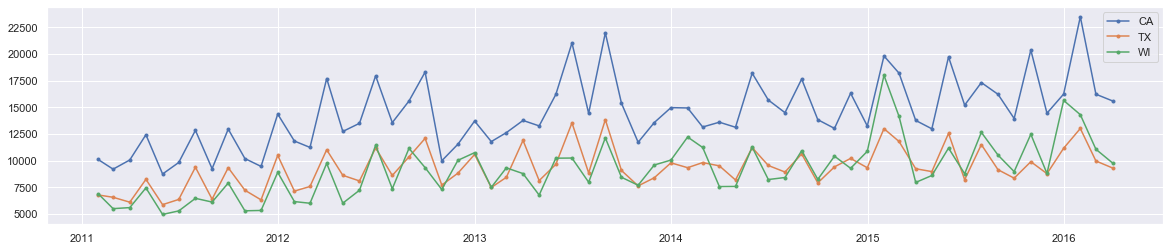

In [28]:
#Time series plot over three states
plt.figure(figsize=(20,4))
plt.plot(state_lvl.asfreq('M').CA, marker='.',label='CA')
plt.plot(state_lvl.asfreq('M').TX, marker='.',label='TX')
plt.plot(state_lvl.asfreq('M').WI, marker='.',label='WI')
plt.legend()
plt.show()

### This is the sales data for each state(CA, TX,WI). We see that there're upward trends during these years for all three states. Comparing between three states, we found that sales in CA has always been the most among three, while TX and WI are almost the same. Notice that if we narrow the scope down to a certain year, the flow might indicates the existence of seasonal pattern. The reason why california fluctuate the most could be explained by the weather there.??
**P.S. In 2013, all three states experience an usual peek which may need to inspect carefully.**

### Sales per store

Now we dissect the data down to state-level and see how the sales data in each state performs.

In [29]:
def extractStateStore(state):
    store = sell_val.groupby(["state_id","store_id"])[date_col].sum().reset_index().set_index('store_id')
    store = store[store['state_id'] == state]
    store.drop('state_id', axis=1, inplace=True)
    store = store.T
    store['datum'] = [base + datetime.timedelta(days=x) for x in range(1913)]
    store.set_index("datum", inplace=True)
    return store

In [30]:
#Store-wise sales data
store_CA = extractStateStore('CA')
store_TX = extractStateStore('TX')
store_WI = extractStateStore('WI')

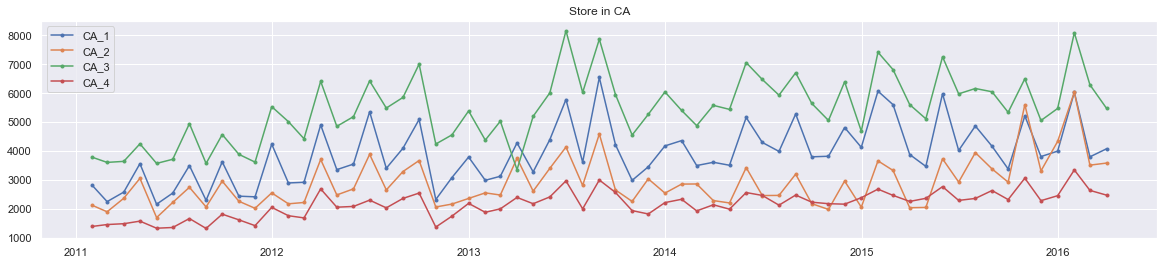

In [31]:
#Time series plot over CA stores
plt.figure(figsize=(20,4))
plt.plot(store_CA.asfreq('M').CA_1, marker='.',label='CA_1')
plt.plot(store_CA.asfreq('M').CA_2, marker='.',label='CA_2')
plt.plot(store_CA.asfreq('M').CA_3, marker='.',label='CA_3')
plt.plot(store_CA.asfreq('M').CA_4, marker='.',label='CA_4')
plt.title("Store in CA")
plt.legend()
plt.show()

### All four stores has almost the same fluctuation which again prove that there's a underlying seasonal pattern.

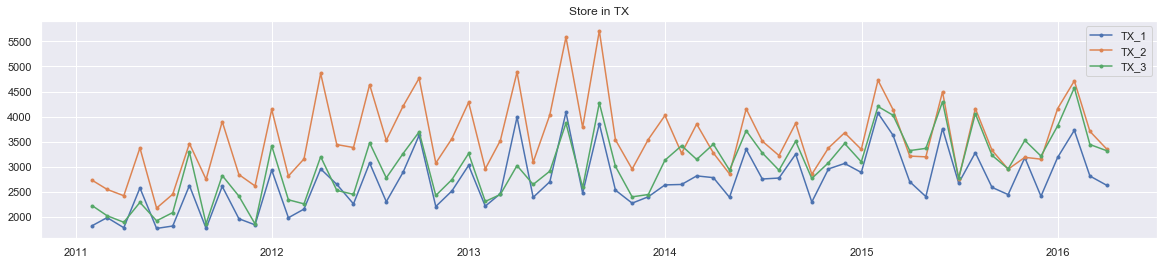

In [32]:
#Time series plot over TX stores
plt.figure(figsize=(20,4))
plt.plot(store_TX.asfreq('M').TX_1, marker='.',label='TX_1')
plt.plot(store_TX.asfreq('M').TX_2, marker='.',label='TX_2')
plt.plot(store_TX.asfreq('M').TX_3, marker='.',label='TX_3')
plt.title("Store in TX")
plt.legend()
plt.show()

### Sales data from TX_2 stands out of the three. Notice that although TX_2 has the best record between 2011 and 2014, in the middle of 2013, it dropped sharply back to approximately the same level as other stores.

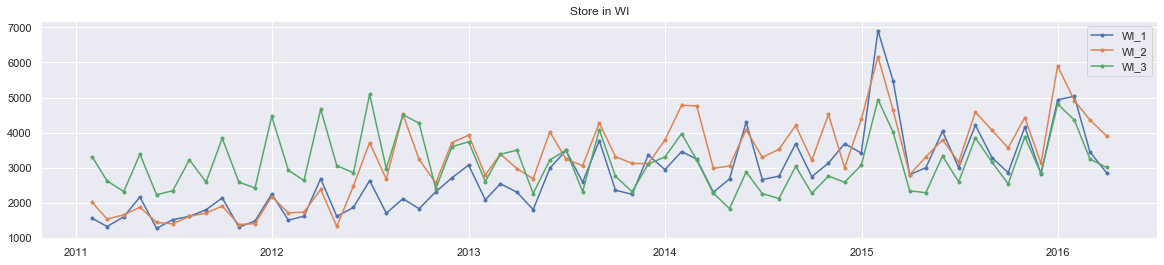

In [33]:
#Time series plot over CA stores
plt.figure(figsize=(20,4))
plt.plot(store_WI.asfreq('M').WI_1, marker='.',label='WI_1')
plt.plot(store_WI.asfreq('M').WI_2, marker='.',label='WI_2')
plt.plot(store_WI.asfreq('M').WI_3, marker='.',label='WI_3')
plt.title("Store in WI")
plt.legend()
plt.show()

### From the plot above I noticed that there're upward or downward trends in specific time period like successive calendar years rather in general. Also seasonal pattern is observed. Notice that in 2013 there's a drop for WI_3 and also all data in general. Moreover at the beginning of 2015, a huge increase occured.

**Dive more into seasonal pattern**

In [34]:
base_2011 = datetime.datetime(2011,1,1)
base_2012 = datetime.datetime(2012,1,1)
base_2013 = datetime.datetime(2013,1,1)
base_2014 = datetime.datetime(2014,1,1)
base_2015 = datetime.datetime(2015,1,1)
base_2016 = datetime.datetime(2016,1,1)
year_divider = [base_2011,base_2012,base_2013,base_2014,base_2015,base_2016]

In [35]:
#Generate yearly report
def yearlyReport(i):
    state_lvl_year = state_lvl.loc[(state_lvl.index > year_divider[i]) & (state_lvl.index < year_divider[i+1])]
    return state_lvl_year

In [36]:
state_lvl_2011 = yearlyReport(0)
state_lvl_2012 = yearlyReport(1)
state_lvl_2013 = yearlyReport(2)
state_lvl_2014 = yearlyReport(3)
state_lvl_2015 = yearlyReport(4)

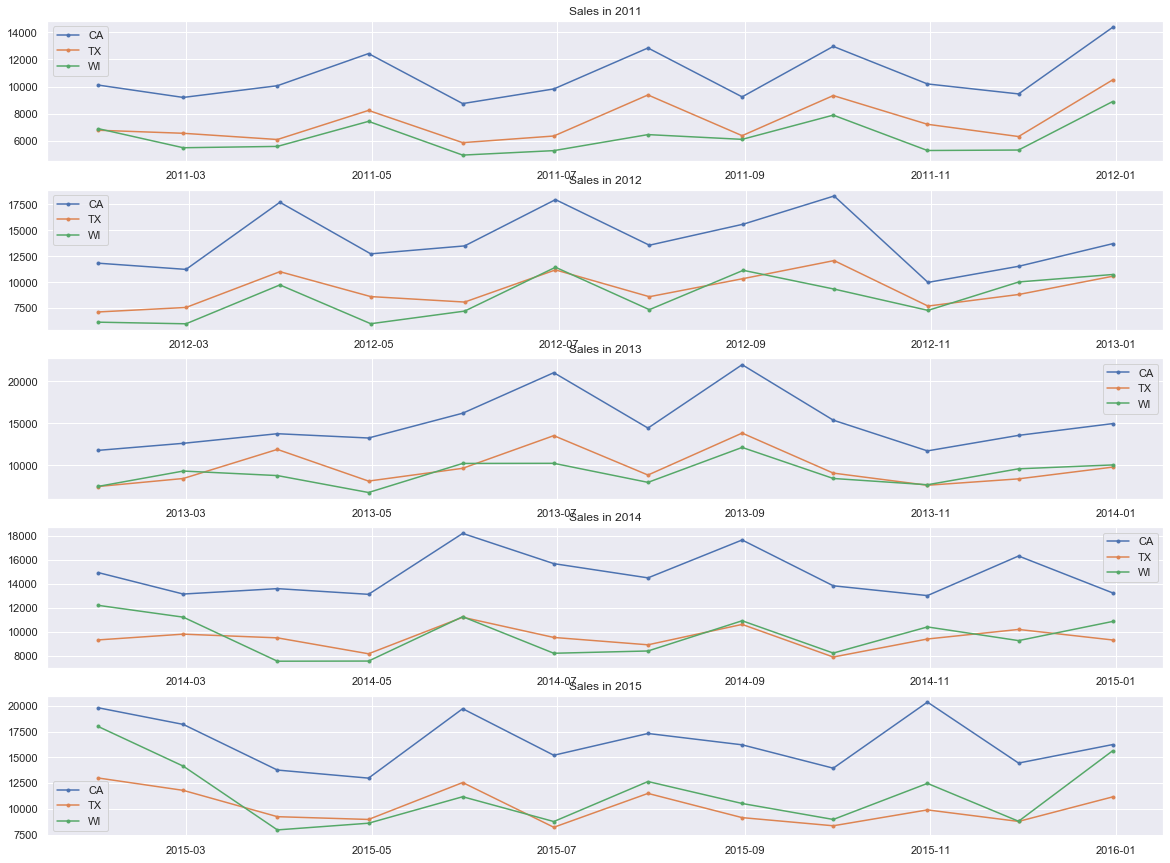

In [37]:
#Time series plot over three states in calendar year 2015
fig = plt.figure(figsize=(20,15))
ax1 = fig.add_subplot(511)
ax1.plot(state_lvl_2011.asfreq('M').CA, marker='.',label='CA')
ax1.plot(state_lvl_2011.asfreq('M').TX, marker='.',label='TX')
ax1.plot(state_lvl_2011.asfreq('M').WI, marker='.',label='WI')
ax1.legend()
plt.title("Sales in 2011")
ax2 = fig.add_subplot(512)
ax2.plot(state_lvl_2012.asfreq('M').CA, marker='.',label='CA')
ax2.plot(state_lvl_2012.asfreq('M').TX, marker='.',label='TX')
ax2.plot(state_lvl_2012.asfreq('M').WI, marker='.',label='WI')
ax2.legend()
plt.title("Sales in 2012")
ax2 = fig.add_subplot(513)
ax2.plot(state_lvl_2013.asfreq('M').CA, marker='.',label='CA')
ax2.plot(state_lvl_2013.asfreq('M').TX, marker='.',label='TX')
ax2.plot(state_lvl_2013.asfreq('M').WI, marker='.',label='WI')
ax2.legend()
plt.title("Sales in 2013")
ax2 = fig.add_subplot(514)
ax2.plot(state_lvl_2014.asfreq('M').CA, marker='.',label='CA')
ax2.plot(state_lvl_2014.asfreq('M').TX, marker='.',label='TX')
ax2.plot(state_lvl_2014.asfreq('M').WI, marker='.',label='WI')
ax2.legend()
plt.title("Sales in 2014")
ax2 = fig.add_subplot(515)
ax2.plot(state_lvl_2015.asfreq('M').CA, marker='.',label='CA')
ax2.plot(state_lvl_2015.asfreq('M').TX, marker='.',label='TX')
ax2.plot(state_lvl_2015.asfreq('M').WI, marker='.',label='WI')
ax2.legend()
plt.title("Sales in 2015")
plt.show()

### Here we go further deeper to analyze each individual year. A surprising finding was that we couldn't classify the fluctuation as seasonal pattern because the peeks and troughs don't happen at the same time each year.  

In [38]:
sell_price

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26
...,...,...,...,...
6841116,WI_3,FOODS_3_827,11617,1.00
6841117,WI_3,FOODS_3_827,11618,1.00
6841118,WI_3,FOODS_3_827,11619,1.00
6841119,WI_3,FOODS_3_827,11620,1.00


### More in-depth analysis

*  Trend of sale under same department across different stores
    
    Condition checked:
    - All departments have products sold in all stores.
    - Exactly same amount of types of products under each department are sold in different stores.

In [39]:
for dept in sell_val['dept_id'].unique():
    dept_across_store = sell_val.loc[sell_val['dept_id'] == dept]
    print(dept,dept_across_store['store_id'].unique())

HOBBIES_1 ['CA_1' 'CA_2' 'CA_3' 'CA_4' 'TX_1' 'TX_2' 'TX_3' 'WI_1' 'WI_2' 'WI_3']
HOBBIES_2 ['CA_1' 'CA_2' 'CA_3' 'CA_4' 'TX_1' 'TX_2' 'TX_3' 'WI_1' 'WI_2' 'WI_3']
HOUSEHOLD_1 ['CA_1' 'CA_2' 'CA_3' 'CA_4' 'TX_1' 'TX_2' 'TX_3' 'WI_1' 'WI_2' 'WI_3']
HOUSEHOLD_2 ['CA_1' 'CA_2' 'CA_3' 'CA_4' 'TX_1' 'TX_2' 'TX_3' 'WI_1' 'WI_2' 'WI_3']
FOODS_1 ['CA_1' 'CA_2' 'CA_3' 'CA_4' 'TX_1' 'TX_2' 'TX_3' 'WI_1' 'WI_2' 'WI_3']
FOODS_2 ['CA_1' 'CA_2' 'CA_3' 'CA_4' 'TX_1' 'TX_2' 'TX_3' 'WI_1' 'WI_2' 'WI_3']
FOODS_3 ['CA_1' 'CA_2' 'CA_3' 'CA_4' 'TX_1' 'TX_2' 'TX_3' 'WI_1' 'WI_2' 'WI_3']


In [40]:
for store in sell_val['store_id'].unique():
    dept_across_store = sell_val.loc[(sell_val['store_id'] == store) & (sell_val['dept_id'] == 'FOODS_3')]
    print(store,len(dept_across_store['item_id'].unique()))

CA_1 823
CA_2 823
CA_3 823
CA_4 823
TX_1 823
TX_2 823
TX_3 823
WI_1 823
WI_2 823
WI_3 823


In [41]:
sell_val

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913,total_sales
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,3,0,1,1,1,3,0,1,1,600
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,1,0,0,0,0,493
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,2,1,1,1,0,1,1,1,288
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,5,4,1,0,1,3,7,2,3288
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,0,1,1,2,2,2,4,1849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3_validation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,2,2,...,0,0,0,0,0,1,0,0,1,1022
30486,FOODS_3_824_WI_3_validation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,0,0,0,0,0,1,0,720
30487,FOODS_3_825_WI_3_validation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,0,6,0,2,...,1,0,2,0,1,0,0,1,0,1712
30488,FOODS_3_826_WI_3_validation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,1,0,0,1,0,3,1,3,702


### Department-level

In [42]:
def extractDepartment(dep_name):
    dept = sell_val.groupby(["dept_id","state_id"])[date_col].sum().reset_index().set_index('state_id')
    dept = dept[dept['dept_id']==dep_name]
    dept.drop('dept_id',axis=1, inplace=True)
    dept = dept.T
    dept['datum'] = [base + datetime.timedelta(days=x) for x in range(1913)]
    dept.set_index("datum", inplace=True)
    return dept

In [43]:
HOBBIES_1 = extractDepartment('HOBBIES_1')
HOBBIES_2 = extractDepartment('HOBBIES_2')
HOUSEHOLD_1 = extractDepartment('HOUSEHOLD_1')
HOUSEHOLD_2 = extractDepartment('HOUSEHOLD_2')
FOODS_1 = extractDepartment('FOODS_1')
FOODS_2 = extractDepartment('FOODS_2')
FOODS_3 = extractDepartment('FOODS_3')
dept_list = [HOBBIES_1, HOBBIES_2, HOUSEHOLD_1, HOUSEHOLD_2, FOODS_1, FOODS_2, FOODS_3]

In [44]:
first_row = sell_val.iloc[sell_val.index==1]
first_row.drop(["id","item_id","cat_id","store_id","state_id","dept_id","total_sales"], axis=1, inplace=True)
first_row = first_row.T
first_row['datum'] = [base + datetime.timedelta(days=x) for x in range(1913)]
first_row['sales'] = first_row[1]
first_row.drop([1], axis=1, inplace=True)
first_row = first_row.set_index("datum")

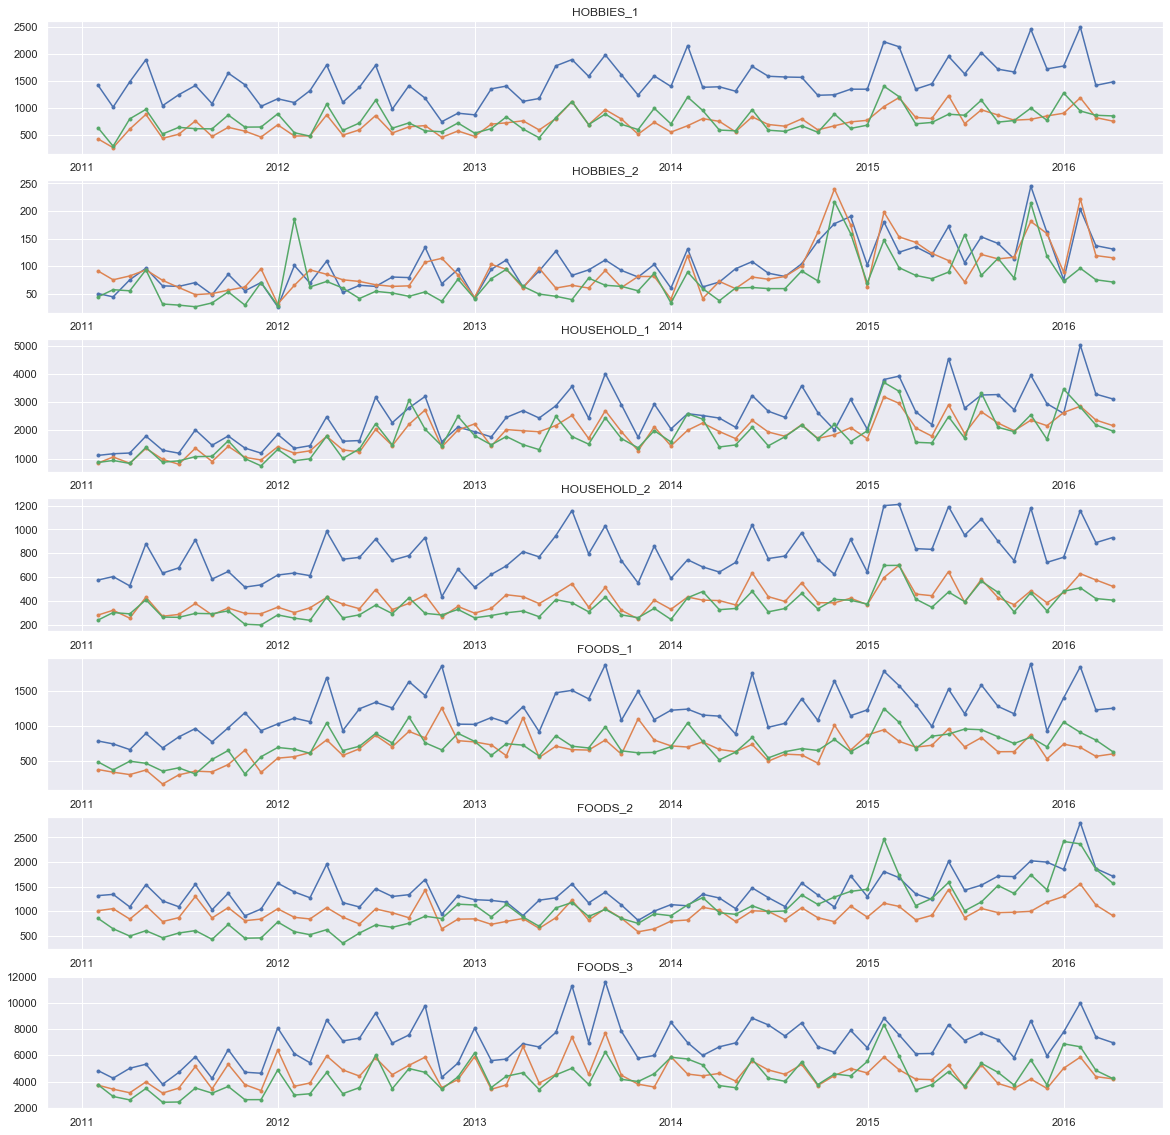

In [45]:
fig = plt.figure(figsize=(20,20))
for i,dept,name in zip(range(1,8),dept_list,sell_val['dept_id'].unique()):
    pos = 710 + i
    ax = fig.add_subplot(pos)
    ax.plot(dept.asfreq('M').CA, marker='.',label='CA')
    ax.plot(dept.asfreq('M').TX, marker='.',label='TX')
    ax.plot(dept.asfreq('M').WI, marker='.',label='WI')
    plt.title(name)
plt.show()

### Here we break the data down to see how each department does among three states.

***Sample sales data engineering***

We choose record at index 21701


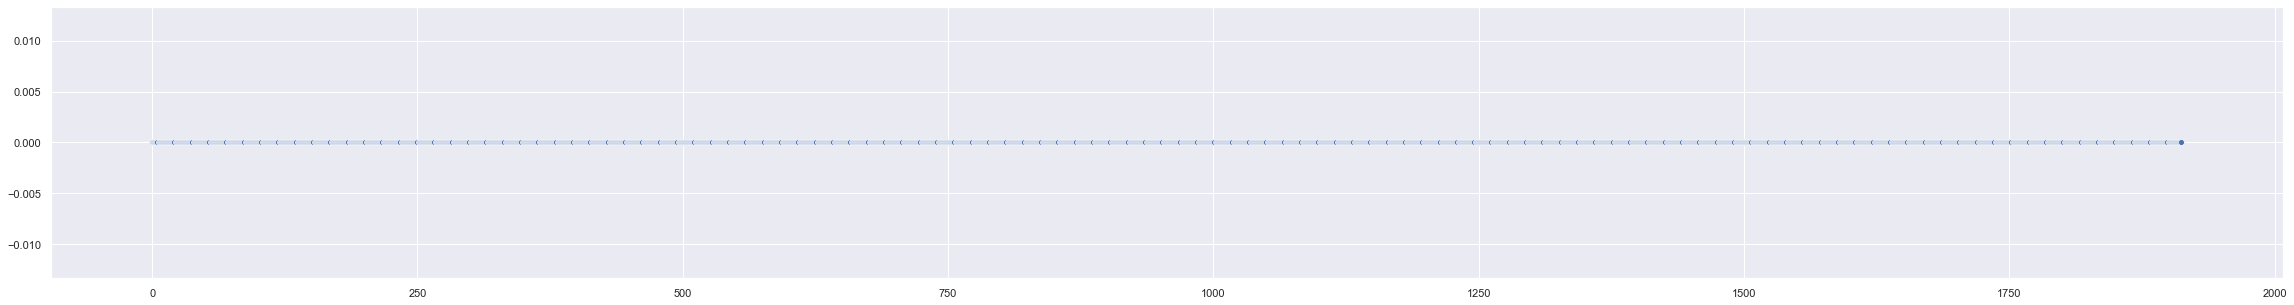

In [46]:
sales_col = [c for c in sell_val.columns if 'd_' in c]
#To take a look at the sample sales data, we randomly pick one record and plot it.
UUID = np.random.randint(len(sell_val))
print('We choose record at index {}'.format(UUID))
random_record = sell_val.loc[UUID,sales_col]
plt.figure(figsize=(40,5))
sns.scatterplot(x=range(len(random_record+1)), y=random_record[1])
plt.show()

**Dataset merging and engineering**

* Merge price into sell_val
* Convert categorical feature into numerical by doing one-hot encoding

### Model exploration
* SimpleExpSmoothing
* 单指数平滑
* 

In [49]:
#Set up a dataframe to store accuracy of each model
predictions = pd.DataFrame()
stats = pd.DataFrame(columns=['Model Name', 'Execution Time','RMSE'])

NameError: name 'plot_acf' is not defined

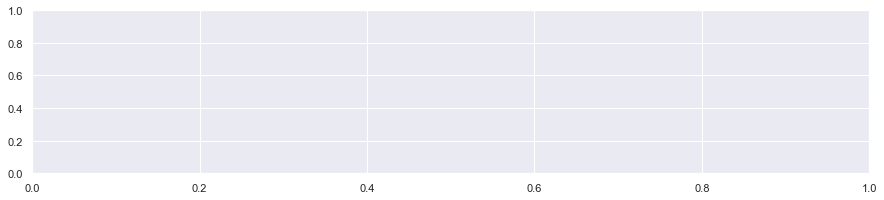

In [50]:
#SES
fig,ax = plt.subplots(figsize=(15,3))
plot_acf(sell_val[])